100%|██████████| 10.0/10.0 [00:16<00:00,  1.64s/it]        


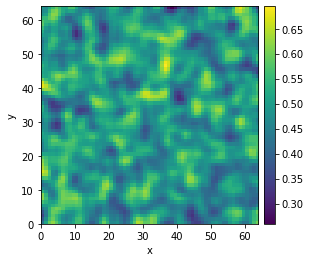

In [2]:
import pde

grid = pde.UnitGrid([64, 64])                 # generate grid
state = pde.ScalarField.random_uniform(grid)  # generate initial condition

eq = pde.DiffusionPDE(diffusivity=0.1)        # define the pde
result = eq.solve(state, t_range=10)          # solve the pde
result.plot()                                 # plot the resulting field

# Example of custom equation:

Korteweg-de Vries equation:

$$\partial_t \phi = 6\phi\partial_x \phi - \partial_{x}^{3}\phi$$

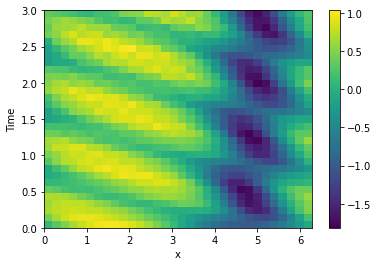

In [3]:
from numpy import pi
eq = pde.PDE(
    {"phi": "6 * phi * get_x(gradient(phi)) - laplace(get_x(gradient(phi)))"},
    user_funcs={"get_x": lambda arr: arr[0]}
)

grid = pde.CartesianGrid([[0, 2 * pi]], [32], periodic=True)
state = pde.ScalarField.from_expression(grid, "sin(x)")

# solve & store
storage = pde.MemoryStorage()
eq.solve(state, t_range=3, tracker=storage.tracker(0.1))

# plot
pde.plot_kymograph(storage)

# My first try using custom equation:

Burgers' Equation:

$$
\partial_t u + u\partial_x u = 0; \qquad u(0, x) = f(x)
$$
Boundary & Initial Conditions
$$
f(x) = -sin(x)\\
u(t, x=-1) = u(t, x=+1) = 0
$$

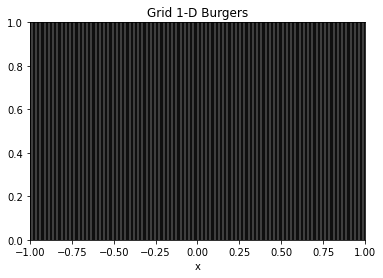

In [19]:
#bc_left = {"value": 0}
#bc_right = {"value": 0}
bc = {"value": 0}#[bc_left, bc_right]
grid = pde.CartesianGrid([[-1,+1]],[256], periodic=False)
grid.plot(title=f'Grid 1-D Burgers')

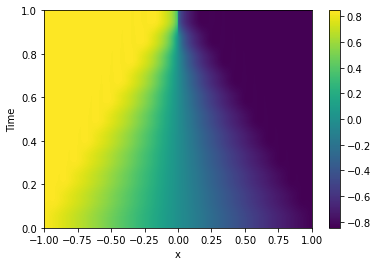

In [20]:
state = pde.ScalarField.from_expression(grid, "-sin(x)")

# equation

eq = pde.PDE(
    {"u": "-u * get_x(gradient(u))"},
    user_funcs={"get_x": lambda arr: arr[0]}
)

# solve & store
storage = pde.MemoryStorage()
eq.solve(state, t_range=1, dt=1e-4, tracker=storage.tracker(0.1)) # t_range > 1 gives error, why?

# plot
pde.plot_kymograph(storage)